In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt
plt.style.use('bmh')
from os.path import basename, splitext

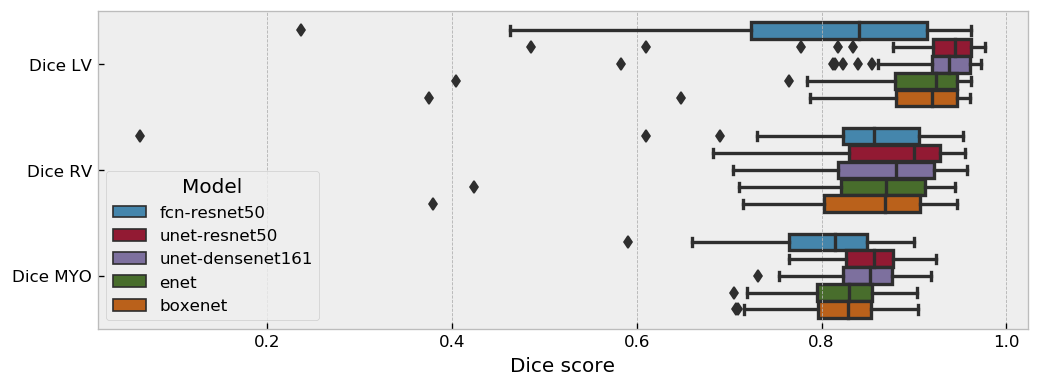

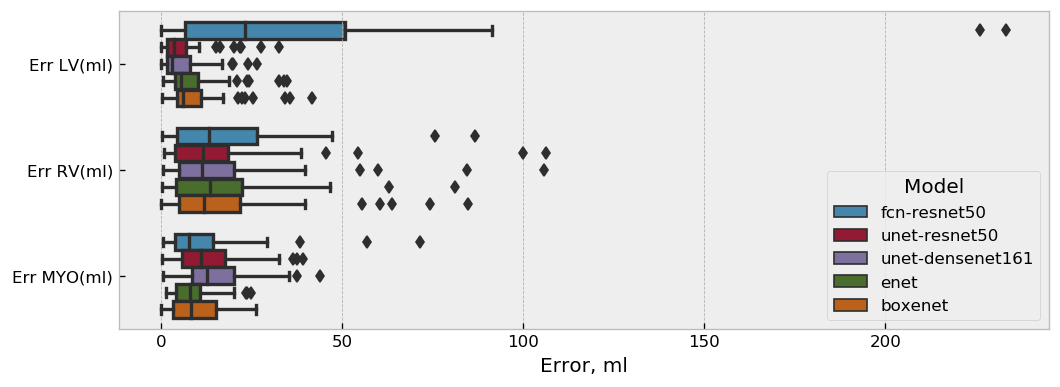

In [2]:
csv_list = [
    '../results_fcn-resnet50.csv',
    '../results_unet-resnet50.csv',
    '../results_unet-densenet161.csv',
    '../results_enet.csv',
    '../results_boxenet.csv',
]
split = pd.read_csv('train_val_split.csv', sep=',')
results = []
for fpath in csv_list:
    name = splitext(basename(fpath))[0].split('_')[1]
    result = pd.read_csv(fpath, sep=',')
    result['val'] = split.val
    result[['Err LV(ml)', 'Err RV(ml)', 'Err MYO(ml)']] = result[['Err LV(ml)', 'Err RV(ml)', 'Err MYO(ml)']].abs()
    val_result = result[result.val == True].assign(Model=name)
    results += [val_result]

plt.figure(figsize=(10,.7*len(csv_list)), dpi=120)
total_results = pd.concat(results)
table = pd.melt(total_results[['Dice LV', 'Dice RV', 'Dice MYO', 'Model']], id_vars=['Model'], var_name=['var'])
sns.boxplot(x='value', y='var', hue='Model', data=table)
plt.xlabel('Dice score')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10,.7*len(csv_list)), dpi=120)
table = pd.melt(total_results[['Err LV(ml)', 'Err RV(ml)', 'Err MYO(ml)', 'Model']], id_vars=['Model'], var_name=['var'])
sns.boxplot(x='value', y='var', hue='Model', data=table)
plt.xlabel('Error, ml')
plt.ylabel('')
plt.show()

In [7]:
total_results['Dice LV'][total_results.Model == 'fcn-resnet50'].argmin()

17

In [8]:
total_results.head(2)

Name   Dice LV   Volume LV  Err LV(ml)   Dice RV   Volume RV  \
28  patient015_ED  0.947095  193.836922    0.971991  0.916543  102.021398   
29  patient015_ES  0.929485  129.947375   14.729365  0.881462   59.945516   

    Err RV(ml)  Dice MYO  Volume MYO  Err MYO(ml)   val         Model  
28   10.299342  0.764738  122.021930     7.196450  True  fcn-resnet50  
29    0.205611  0.856395  141.648625     4.616948  True  fcn-resnet50

In [9]:
val_name = 'Err LV(ml)'
ascending = False

In [10]:
total_results[['Name', val_name, 'Model', 'val']][total_results.Model == 'fcn-resnet50'].sort_values(val_name, ascending=ascending).head()

Name  Err LV(ml)         Model   val
30   patient016_ED  233.395145  fcn-resnet50  True
31   patient016_ES  226.021238  fcn-resnet50  True
198  patient100_ED   91.430132  fcn-resnet50  True
118  patient060_ED   86.743148  fcn-resnet50  True
119  patient060_ES   85.986320  fcn-resnet50  True

In [11]:
total_results[['Name', val_name, 'Model', 'val']][total_results.Model == 'unet-resnet50'].sort_values(val_name, ascending=ascending).head()

Name  Err LV(ml)          Model   val
32   patient017_ED   32.617195  unet-resnet50  True
30   patient016_ED   27.531980  unet-resnet50  True
117  patient059_ES   22.150122  unet-resnet50  True
31   patient016_ES   21.703887  unet-resnet50  True
195  patient098_ES   20.046875  unet-resnet50  True

In [12]:
total_results[['Name', val_name, 'Model', 'val']][total_results.Model == 'unet-densenet161'].sort_values(val_name, ascending=ascending).head()

Name  Err LV(ml)             Model   val
117  patient059_ES   26.393224  unet-densenet161  True
39   patient020_ES   23.946700  unet-densenet161  True
32   patient017_ED   19.799789  unet-densenet161  True
30   patient016_ED   19.740292  unet-densenet161  True
195  patient098_ES   16.875000  unet-densenet161  True

In [13]:
total_results[['Name', val_name, 'Model', 'val']][total_results.Model == 'enet'].sort_values(val_name, ascending=ascending).head()

Name  Err LV(ml) Model   val
32  patient017_ED   34.814445  enet  True
38  patient020_ED   34.112448  enet  True
39  patient020_ES   32.660200  enet  True
30  patient016_ED   24.377698  enet  True
33  patient017_ES   23.657211  enet  True

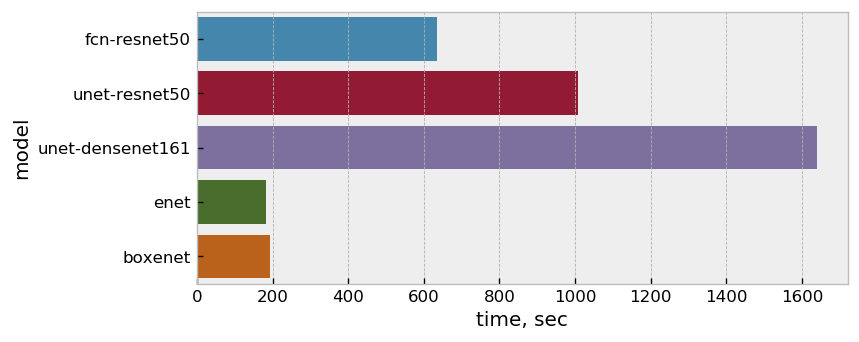

In [18]:

df = pd.DataFrame.from_dict({
    'time, sec' : [635, 1007, 1639, 182, 194],
    'model' : ['fcn-resnet50', 'unet-resnet50', 'unet-densenet161', 'enet', 'boxenet']
})

plt.figure(figsize=(7,3), dpi=120)
sns.barplot(data=df, y='model', x='time, sec')
plt.show()